# "If doing statistics doesn't make you uncomfortable, you are probably doing it wrong"

—Vijay

# Our aim in science is to understand objective truths in the world.

# However, you can never know anything with absolute certainty. All you can do is to quantify how wrong you think you are.

# Let us consider an example. You manipulated the activity of your favorite neurons in one group of animals. The other group was a control group with no manipulation.

# You find that the animals can now predict the future!!!!!! (p<0.05)

<img src="figures/stats/f1.png"/>

## Is there anything you can say with absolute certainty given this finding? 

## Is this statement useful?

&nbsp;

&nbsp;

<a id="part1"></a>

# PART 1. Population versus Sample


What **are** you trying to say when you make a statistical statement about the population? 

When making any *useful* statistical claim, you are always making a statement about the population and not just about your small sample of the population.

Is it even possible to say something about the population without actually measuring every single piece of data in the population?

* Do YOU believe that you can say what will happen as you collect more data (with reasonable certainty) without actually collecting it? How many of you will be ready to believe that you can make a statement about *unseen* data?

* This is why statistics should make you uncomfortable. If you ever said "p<0.05", you have made a statement about unseen data

How can one infer anything about the population without seeing all the data?

The only way to proceed is to make some assumption regarding how the unseen data will look. The most important assumption is that the data comes from some pre-specified probability distribution. 

An example distribution is a **NORMAL** distribution (bell curve)

Such an assumption of a distribution for the population is **THE MOST IMPORTANT ASSUMPTION IN STATISTICS**. 

* Without this assumption, there is **NO WAY** to guess how uncollected data will look. So any statement that you make or have made about stats (e.g. p values) are only as worth as the assumptions you made about the data. If your assumption is wrong, your statement is wrong. Plain and simple! 

* If this fact makes you really worried about making any statistical assertion, then good! You should always be cautious about statistical claims you are making and make sure to be very careful in using statistics. 

We will now use some Python code to illustrate these ideas

(Don't worry if you don't understand specifics of the code; it's all on GitHub to peruse later.)

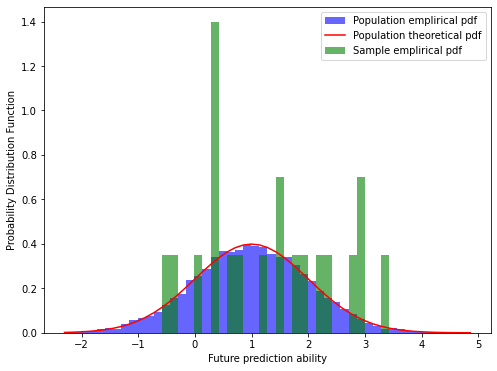

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm

np.random.seed(100)

# Create a population of normally distributed random numbers.
# This is supposed to represent an entire population of interest.
# You have explicitly modeled your population as normally distributed.
pop_mean = 1
pop_std = 1
pop_size = 10000
numbins = 50
population = np.random.normal(pop_mean, pop_std,
                              size=(pop_size,))

fig, ax = plt.subplots(figsize=(8,6))
pdf, bins, _ = ax.hist(population,
                       bins=numbins,
                       density=True,
                       label='Population emplirical pdf',
                       alpha=0.6,
                       color='b')
ax.plot(bins, stats.norm.pdf(bins, pop_mean, pop_std), 'r',
        label='Population theoretical pdf')
ax.set_xlabel('Future prediction ability')
ax.set_ylabel('Probability Distribution Function')


# Now randomly select a sample from the population
sample_size = 20
sample = np.random.choice(population,
                          size=sample_size,
                          replace=False)
_ = ax.hist(sample,
            bins=bins,
            density=True,
            label='Sample emplirical pdf',
            alpha=0.6,
            color='g')
ax.legend()

plt.show()

Now let us plot this same data using the distribution's cumulative distribution function. The CDF plots the **percentile of each observation**. Just that instead of a % unit, you will have a scale from 0 to 1. In other words, CDF(x) is simply the percentile of x divided by 100

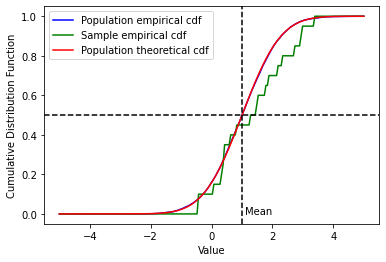

In [84]:
xlocs = np.linspace(-5, 5, 200)
fig, ax = plt.subplots()
ax.plot(xlocs, sm.distributions.ECDF(population)(xlocs), 'b',
        label='Population empirical cdf')
ax.plot(xlocs, sm.distributions.ECDF(sample)(xlocs), 'g',
        label='Sample empirical cdf')
ax.plot(xlocs, stats.norm.cdf(xlocs, pop_mean, pop_std), 'r',
        label='Population theoretical cdf')
ax.axhline(0.5,
           linestyle='--',
           color='k')
ax.axvline(pop_mean,
           linestyle='--',
           color='k')
ax.text(pop_mean+0.1*pop_std, 0, 'Mean')
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Cumulative Distribution Function')

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

You can notice from the above simulation that samples from the population often look nothing like the population, especially at low sample sizes. This should really make you worried because as we discussed, in real data, we know nothing about the population. We are simply trying to estimate how the population should look based on a small sample from the population.   

Now let us see how a distribution that is not normal looks like. 

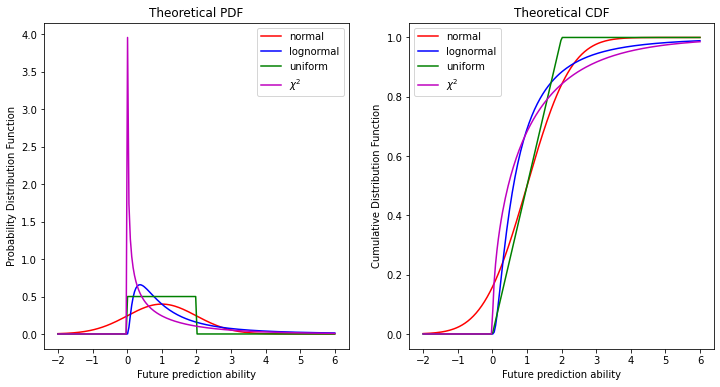

In [85]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
xlocs = np.linspace(-2, 6, 200)
axs[0].plot(xlocs, stats.norm.pdf(xlocs, pop_mean, pop_std), 'r',
            label='normal')
axs[0].plot(xlocs, stats.lognorm.pdf(xlocs, pop_std, scale=pop_mean), 'b',
            label='lognormal')
axs[0].plot(xlocs, stats.uniform.pdf(xlocs, pop_mean-pop_std, pop_mean+pop_std), 'g',
            label='uniform')
axs[0].plot(xlocs, stats.chi2.pdf(xlocs, pop_mean), 'm',
            label='$\chi^2$')
axs[0].set_title('Theoretical PDF')
axs[0].legend()
axs[0].set_xlabel('Future prediction ability')
axs[0].set_ylabel('Probability Distribution Function')

axs[1].plot(xlocs, stats.norm.cdf(xlocs, pop_mean, pop_std), 'r',
            label='normal')
axs[1].plot(xlocs, stats.lognorm.cdf(xlocs, pop_std, scale=np.exp(np.log(pop_mean)-pop_std**2/2.0)), 'b',
            label='lognormal')
axs[1].plot(xlocs, stats.uniform.cdf(xlocs, pop_mean-pop_std, pop_mean+pop_std), 'g',
            label='uniform')
axs[1].plot(xlocs, stats.chi2.cdf(xlocs, pop_mean), 'm',
            label='$\chi^2$')
axs[1].set_title('Theoretical CDF')
axs[1].legend()
axs[1].set_xlabel('Future prediction ability')
axs[1].set_ylabel('Cumulative Distribution Function')

plt.show()

These distributions plotted above are all dramatically different from each other. I also said that the assumption about the distribution is the most important assumption in statistics.  
<br>


So, which of the above distributions should we use as a model for our data? 

Turns out that there is this **SUPER CONVENIENT** mathematical theorem called CENTRAL LIMIT THEOREM that saves us. 

What the CLT states is that regardless of the starting distribution, the distribution formed by the mean of a sample will converge towards a normal distribution.

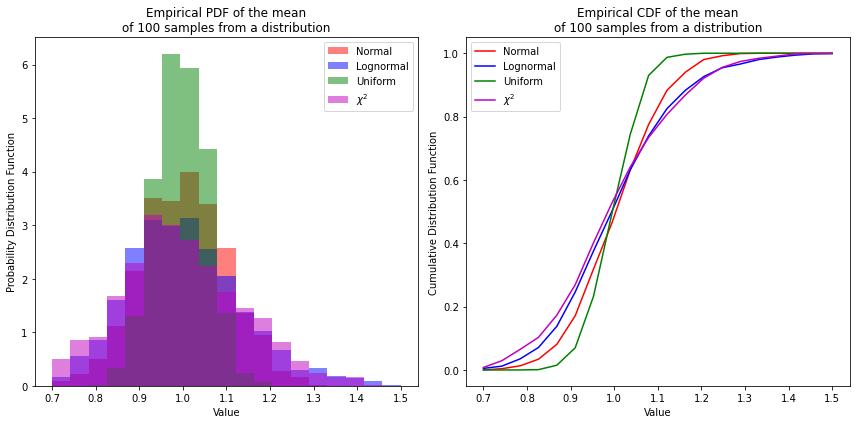

In [88]:
sample_size = 100
numrepeats = 1000
xlocs = np.linspace(1-3.0/sample_size**0.5, 1+5.0/sample_size**0.5, 20)
fig, axs = plt.subplots(1,2,figsize=(12,6))

axs[0].set_title(f'Empirical PDF of the mean\nof {sample_size} samples from a distribution')
axs[1].set_title(f'Empirical CDF of the mean\nof {sample_size} samples from a distribution')

# For each repeat, get a random sample from the normal distribution
sample = np.array([np.mean(stats.norm.rvs(pop_mean, pop_std,
                                          size=sample_size))
                   for i in range(numrepeats)])
_=axs[0].hist(sample, xlocs,
              color='r',
              label='Normal',
              density=True,
              alpha=0.5)
axs[1].plot(xlocs, sm.distributions.ECDF(sample)(xlocs), 'r',
            label='Normal')

sample = np.array([np.mean(stats.lognorm.rvs(pop_std,
                                             scale=np.exp(np.log(pop_mean)-pop_std**2  /2.0),
                                             size=sample_size))
                   for i in range(numrepeats)])
_=axs[0].hist(sample, xlocs,
              color='b',
              label='Lognormal',
              density=True,
              alpha=0.5)
axs[1].plot(xlocs, sm.distributions.ECDF(sample)(xlocs), 'b',
            label='Lognormal')

sample = np.array([np.mean(stats.uniform.rvs(pop_mean-pop_std, pop_mean+pop_std,
                                             size=sample_size))
                   for i in range(numrepeats)])
_=axs[0].hist(sample, xlocs,
              color='g',
              label='Uniform',
              density=True,
              alpha=0.5)
axs[1].plot(xlocs, sm.distributions.ECDF(sample)(xlocs), 'g',
            label='Uniform')

sample = np.array([np.mean(stats.chi2.rvs(pop_mean,
                                          size=sample_size))
                   for i in range(numrepeats)])
_=axs[0].hist(sample, xlocs,
              color='m', 
              label='$\chi^2$',
              density=True,
              alpha=0.5)
axs[1].plot(xlocs, sm.distributions.ECDF(sample)(xlocs), 'm',
            label='$\chi^2$')

axs[0].legend()
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Probability Distribution Function')
axs[1].legend()
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Cumulative Distribution Function')
fig.tight_layout()

plt.show()

VOILA! All of the distributions now look quite close to normal! This is the magic of the CLT. Even though you started with highly non-normal distributions, the distribution of the means of samples from these distributions is normal!

How does this help us?

# PART 2. Sampling distribution of the mean

* In most cases, what we want to test is whether the **MEAN** of a population abides by some prediction. How do we guess anything about the mean of the population from samples?

* From Central Limit Theorem, we know that the distribution of **sample means** is approximately normal **regardless** of the distribution of the sample! Turns out that the expected mean of this distribution is the mean of the population, and the standard deviation of this distribution, called the *standard error of the mean*, is given by

* standard error of the mean = $\frac{population\:standard\:deviation}{\sqrt{sample\:size}}$

So, the higher the sample size, the lower the uncertainty about the population mean given a sample

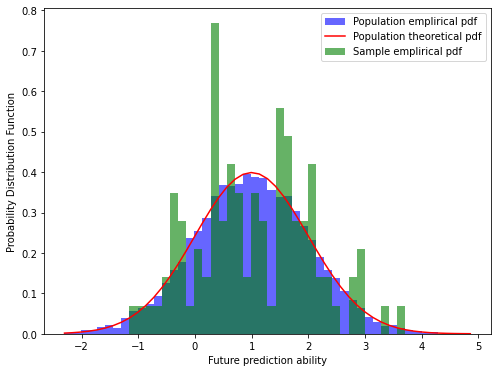

In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

np.random.seed(100)

# Create a population of normally distributed random numbers.
# This is supposed to represent an entire population of interest.
# You have explicitly modeled your population as normally distributed.
pop_mean = 1
pop_std = 1
pop_size = 10000
numbins = 50
population = np.random.normal(pop_mean, pop_std,
                              size=(pop_size,))

fig, ax = plt.subplots(figsize=(8,6))
pdf, bins, _ = ax.hist(population,
                       bins=numbins,
                       density=True,
                       label='Population emplirical pdf',
                       alpha=0.6,
                       color='b')
ax.plot(bins, stats.norm.pdf(bins, pop_mean, pop_std), 'r',
        label='Population theoretical pdf')


# Now randomly select a sample from the population
sample_size = 100
sample = np.random.choice(population,
                          size=sample_size,
                          replace=False)
_ = ax.hist(sample,
            bins=bins,
            density=True,
            label='Sample emplirical pdf',
            alpha=0.6,
            color='g')
ax.legend()
ax.set_xlabel('Future prediction ability')
ax.set_ylabel('Probability Distribution Function')

plt.show()

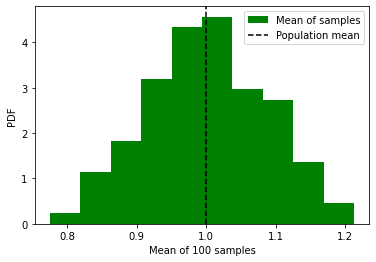

In [95]:
sample_size = 100
means_samples = np.array([np.mean(population[i*sample_size:(i+1)*sample_size])
                          for i in range(pop_size//sample_size)])
fig, ax = plt.subplots()
_=ax.hist(means_samples,
          density=True,
          label='Mean of samples',
          color='g')
ax.axvline(pop_mean,
           color='k',
           linestyle='--',
           label='Population mean')
ax.legend()
ax.set_ylabel('PDF')
ax.set_xlabel('Mean of %d samples'%sample_size)

plt.show()

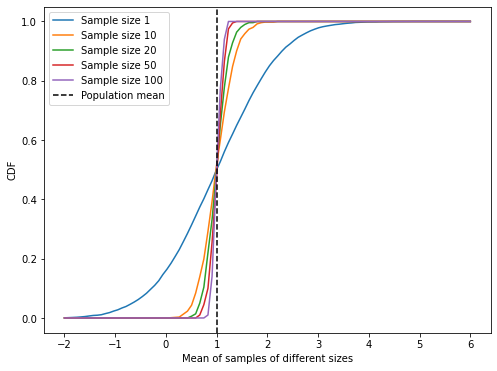

In [96]:
sample_sizes = [1, 10, 20, 50, 100]
xlocs = np.linspace(-2, 6, 100)
fig, ax = plt.subplots(figsize=(8,6))
for sample_size in sample_sizes:
    means_samples = np.array([np.mean(population[i*sample_size:(i+1)*sample_size])
                              for i in range(pop_size//sample_size)])
    ax.plot(xlocs, sm.distributions.ECDF(means_samples)(xlocs),
            label='Sample size %d'%(sample_size))
ax.axvline(pop_mean,
           color='k',
           linestyle='--',
           label='Population mean')
ax.legend()
ax.set_ylabel('CDF')
ax.set_xlabel('Mean of samples of different sizes')

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## So to conclude, 

* the mean of your sample is expected to be the mean of the population

* the expected uncertainty of this mean (i.e., s.e.m) reduces when you have larger samples

# PART 3. p value and power

Great! Now you want to say something **USEFUL** about your experiment. How do you do this?

In your sample, you found that the mice gained the ability to predict the future. Example useful statements about this are of the type: 

* My statement has the chance of being wrong with XX probability. Given this low probability, I am gonna say this is a **truth of the world**

But what do I mean by "probability of **being wrong**"? Here, we will consider three types of error probabilities

* The probability that I will find an effect in my sample given that there is no real effect in the population.

* The probability that I will find no effect in my sample given that there is a real effect in the population.

* The probability that there is a real effect in the population given that I found an effect in my sample.

## Illustration of p value

Everything you will see from now on applies to ANY statistical test. For simplicity, we will use a t test.

Mean = 0.23629531694798236


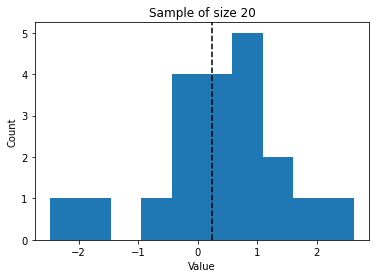

In [99]:
import statsmodels.api as sm

# Create a random sample

np.random.seed(6)

pop_mean = 0
pop_std = 1

# Create a random sample of 20 numbers from a normal distribution
# with the above population mean and std.
sample_size = 20
sample = np.random.normal(pop_mean, pop_std, size=(sample_size,))

plt.title(f'Sample of size {sample_size}')
plt.hist(sample);
plt.axvline(sample.mean(), c='k', ls='--')
plt.xlabel('Value')
plt.ylabel('Count')
print("Mean = {}".format(sample.mean()))

In [100]:
# Let's do a t-test to check if this sample mean is different from 0
t, p = stats.ttest_1samp(sample, 0)
print(f't-test result: t = {t:0.3f}, p = {p}')

t-test result: t = 0.943, p = 0.3576130217119454


&nbsp;

&nbsp;

&nbsp;

&nbsp;

That seems reasonable. We found that when 20 samples are drawn from a normal distribution of population mean 0, a test of whether the inferred population mean is different from zero yields a non-significant p value, suggesting that the mean is indeed not different from zero.

But what happens if you repeat this test 1000 times? We will store the p value obtained from each experiment and plot its CDF to look at the distribution of the p values

With significance level at 0.05:
Number of tests with p<0.05 = 46
Fraction of tests with p<0.05 = 0.046


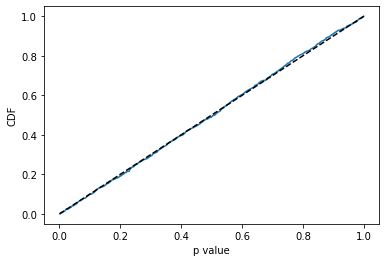

In [101]:
numexperiments = 1000
pvals_experiment = np.nan*np.ones((numexperiments,))
for i in range(numexperiments):
    sample = np.random.normal(pop_mean, pop_std,
                              size=(sample_size,))
    _, pvals_experiment[i] = stats.ttest_1samp(sample, 0)
    
fig, ax = plt.subplots()
ax.plot(np.sort(pvals_experiment), sm.distributions.ECDF(pvals_experiment)(np.sort(pvals_experiment)))
ax.plot([0, 1], [0, 1], '--k')
ax.set_xlabel('p value')
ax.set_ylabel('CDF')

print('With significance level at 0.05:')
print(f'Number of tests with p<0.05 = {np.sum(pvals_experiment<0.05)}')
print(f'Fraction of tests with p<0.05 = {np.sum(pvals_experiment<0.05) / numexperiments}')

&nbsp;

&nbsp;

&nbsp;

&nbsp;

This is kinda crazy! Even though **WE KNOW** there is no effect, ~50 experiments yielded significant p values!

The reason for this is that every test results in false positives! Even though there really was no real effect, there still can be false positives!

How can we calculate the false positive rate from the above graph?

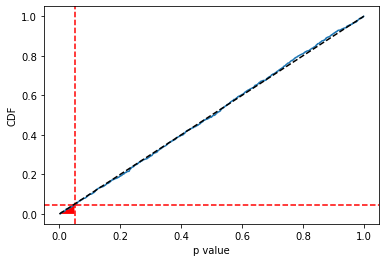

In [102]:
fig, ax = plt.subplots();
ax.plot(np.sort(pvals_experiment), sm.distributions.ECDF(pvals_experiment)(np.sort(pvals_experiment)));
ax.fill_between(np.sort(pvals_experiment), sm.distributions.ECDF(pvals_experiment)(np.sort(pvals_experiment)),
                where=np.sort(pvals_experiment)<0.05,
                facecolor='r');
ax.axvline(0.05,
           color='r',
           linestyle='--');
ax.axhline(sm.distributions.ECDF(pvals_experiment)(0.05),
           color='r',
           linestyle='--');
ax.plot([0, 1], [0, 1], '--k');
ax.set_xlabel('p value');
ax.set_ylabel('CDF');

### p value = 0.05 does not necessarily result in a false positive rate of 0.05 if you violate the assumptions of the test

Here, we will use a two sample t test. A two sample t test tests whether two different populations have different means from each other. This test still assumes normality for both populations just like the one sample t test. 

But it makes an additional assumption, which is that both populations have equal variance. We will now test how sensitive this test is to this assumption.

Both means = 0
Group 1 S.D. = 1
Group 2 S.D. = 10
False positive rate = 0.08


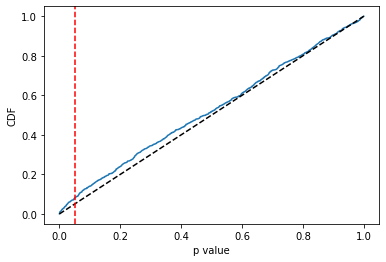

In [103]:
sample_size1=6
sample_size2=6

std_1 = 1
std_2 = 10

np.random.seed(87)

numexperiments = 1000
pvals_experiment = np.nan*np.ones((numexperiments,))
for i in range(numexperiments):
    sample1 = np.random.normal(0, std_1, size=(sample_size1,))
    sample2 = np.random.normal(0, std_2, size=(sample_size2,))
#     print sample1, sample2
    _, pvals_experiment[i] = stats.ttest_ind(sample1, sample2,
                                             equal_var=True)
    
fig, ax = plt.subplots()
ax.plot(np.sort(pvals_experiment), sm.distributions.ECDF(pvals_experiment)(np.sort(pvals_experiment)))
ax.plot([0, 1], [0, 1], '--k')
ax.axvline(0.05,
           color='r',
           linestyle='--')
ax.set_xlabel('p value')
ax.set_ylabel('CDF')

print('Both means = 0')
print(f'Group 1 S.D. = {std_1}')
print(f'Group 2 S.D. = {std_2}')

print(f'False positive rate = {(np.sum(pvals_experiment<0.05)+0.0)/numexperiments}')

It has a slightly higher false positive rate of ~8% even though test says it must be 5%, but this is not too bad, especially considering that the variances are an order of magnitude different

What if the sample sizes are also different?

Both means = 0
Group 1 N = 60
Group 1 S.D. = 1
Group 2 N = 6
Group 2 S.D. = 10
False positive rate for t test = 0.575


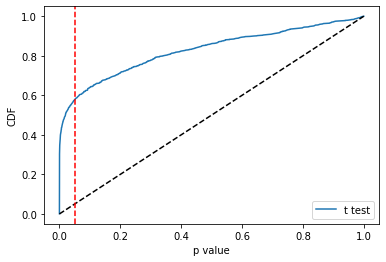

In [105]:
sample_size1=60
sample_size2=6

std_1 = 1
std_2 = 10

np.random.seed(88)

numexperiments = 1000
pvals_ttest = np.nan*np.ones((numexperiments,))
pvals_mannwhitneyu = np.nan*np.ones((numexperiments,))
for i in range(numexperiments):
    sample1 = np.random.normal(1, std_1, size=(sample_size1,))
    sample2 = np.random.normal(1, std_2, size=(sample_size2,))
#     print sample1, sample2
    _, pvals_ttest[i] = stats.ttest_ind(sample1, sample2, equal_var=True)
#     _, pvals_mannwhitneyu[i] = stats.mannwhitneyu(sample1, sample2, alternative='two-sided')
    
fig, ax = plt.subplots()
ax.plot(np.sort(pvals_ttest), sm.distributions.ECDF(pvals_ttest)(np.sort(pvals_ttest)), label='t test')
# ax.plot(np.sort(pvals_mannwhitneyu),
#         sm.distributions.ECDF(pvals_mannwhitneyu)(np.sort(pvals_mannwhitneyu)),
#         label='Mann Whitney U test')
ax.plot([0, 1], [0, 1], '--k')
ax.axvline(0.05,
           color='r',
           linestyle='--')
ax.set_xlabel('p value')
ax.set_ylabel('CDF')
ax.legend()

print('Both means = 0')
print(f'Group 1 N = {sample_size1}')
print(f'Group 1 S.D. = {std_1}')
print(f'Group 2 N = {sample_size2}')
print(f'Group 2 S.D. = {std_2}')

print(f'False positive rate for t test = {(np.sum(pvals_ttest<0.05)+0.0)/numexperiments}')
# print 'Rate of positives (either power or false positive rate) for U test = %f'%((np.sum(pvals_mannwhitneyu<0.05)+0.0)/numexperiments)

### So to conclude, just because a test says p = 0.05 does NOT mean the false positive rate is 5%. It is your job to actually measure the false positive rate of your test and report *that number* as the correct p value of your test

## Illustration of power

Now we are ready to move on to something more useful. Ensuring false positive rates are controlled is basically just a sanity check that our method doesn't give us absurd results when there really isn't any effect. 

But what if there indeed is a real effect? How often can we detect a significant difference between two populations that truly are different?

All we have to do to find out is to use the same code as we previously used for estimating false positives but now have two populations that are truly different from each other

Both N = 6
Both S.D. = 1
Group 1 mean = 1
Group 2 mean = 0
Rate of positives, i.e., power = 0.337


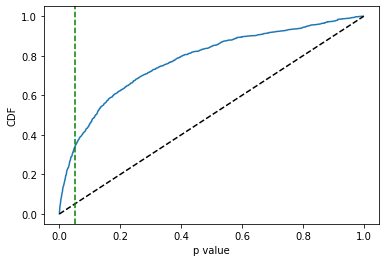

In [106]:
sample_size1=6
sample_size2=6

mean_1 = 1
mean_2 = 0

std_1 = 1
std_2 = 1

numexperiments = 1000
pvals_experiment = np.nan*np.ones((numexperiments,))
for i in range(numexperiments):
    sample1 = np.random.normal(mean_1, std_1,
                               size=(sample_size1,))
    sample2 = np.random.normal(mean_2, std_2,
                               size=(sample_size2,))
#     print sample1, sample2
    _, pvals_experiment[i] = stats.ttest_ind(sample1, sample2,
                                             equal_var=False)
    
fig, ax = plt.subplots()
ax.plot(np.sort(pvals_experiment), sm.distributions.ECDF(pvals_experiment)(np.sort(pvals_experiment)))
ax.plot([0, 1], [0, 1], '--k')
ax.axvline(0.05,
           color='g',
           linestyle='--')
ax.set_xlabel('p value')
ax.set_ylabel('CDF')

print( f'Both N = {sample_size1}' )
print( f'Both S.D. = {std_1}' )
print( f'Group 1 mean = {mean_1}' )
print( f'Group 2 mean = {mean_2}' )

print(f'Rate of positives, i.e., power = {(np.sum(pvals_experiment<0.05)+0.0)/numexperiments}')

This probability--the probability that you can detect a significant difference between two populations when they are truly different--is called statistical **power**. 

Can you guess three ways in which we can increase the power?

# We've covered

* Making inferences about populations based on samples
    * Distributional assumptions

* Getting some help from asymptotics
    * The central limit theorem means most means tend toward normal
    * Our measurements get more precise with more samples

## We've covered

* The probability that I will **find an effect** in my sample given that **there is no real effect** in the population.
    * The **$p$-value** (under good conditions)

* The probability that I will **find no effect** in my sample given that **there is a real effect** in the population.
    * $1 -$ the **power**

## But how do we know whether there actually is an effect?

## Illustration of positive predictive value

Let us now go back to the original result you found about your favorite neurons increasing the ability of mice to predict the future. 

Is this likely to be a false positive (i.e., the population has no real effect) or a true positive (i.e., the population has a real effect)?

How do we quantify the intuition that the result we obtained is likely due to chance?

People often say p value quantifies the probability that our result happened by chance. This is wrong. p value measures the probability of seeing a result at least as strong as what we observed given that there was no effect.

i.e., p value := p(effect in your sample | no clairvoyance in population)

Instead, what you really want to know is p(clairvoyance in population | effect in your sample). This number is called the positive predictive value.

If positive predictive value is high, the effect you observed is unlikely to be due to chance

We will now see a real-world example of this in relation to covid tests